<h2>Calculates the CHARIS major basin area by elevations</h2>


In [47]:
%pylab notebook
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as md
#from nose.tools import set_trace
from charistools.convertors import Dem2Hypsometry
from charistools.convertors import Modice2Hypsometry
from charistools.hypsometry import Hypsometry
from charistools.meltModels import TriSurfTempIndexMelt
from charistools.meltModels import ImshowTriSurfMelt
from charistools.meltModels import PlotTriSurfInput
from charistools.meltModels import PlotTriSurfMelt
from charistools.modelEnv import ModelEnv
from charistools.timeSeries import TimeSeries
import pandas as pd
import re
import os

Populating the interactive namespace from numpy and matplotlib


/projects/brodzik/miniconda3/envs/charis/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [45]:
configFile = '/projects/brodzik/charis_ti_melt/calibration_modelEnv_config.ini'
myEnv = ModelEnv(tileConfigFile=configFile)

# reset basin mask directory  and filename patterns slightly
print("Before:")
print(myEnv.tileConfig['input']['fixed']['basin_mask']['dir'])
print(myEnv.tileConfig['input']['fixed']['basin_mask']['pattern'])
print(myEnv.tileConfig['hypsometry']['area_by_elevation']['dir'])
print(myEnv.tileConfig['hypsometry']['modice_min05yr_by_elevation']['dir'])

myEnv.tileConfig['input']['fixed']['basin_mask']['dir'] = "%MODEL_TOP_DIR%/basins/major_basins"
myEnv.tileConfig['input']['fixed']['basin_mask']['pattern'] = "%DRAINAGEID%.basin_mask.%TILEID%.tif"
myEnv.tileConfig['hypsometry']['area_by_elevation']['dir'] = "%MODEL_TOP_DIR%/derived_hypsometries/REECv0"
myEnv.tileConfig['hypsometry']['modice_min05yr_by_elevation']['dir'] = "%MODEL_TOP_DIR%/derived_hypsometries/REECv0"

print("After:")
print(myEnv.tileConfig['input']['fixed']['basin_mask']['dir'])
print(myEnv.tileConfig['input']['fixed']['basin_mask']['pattern'])
print(myEnv.tileConfig['hypsometry']['area_by_elevation']['dir'])
print(myEnv.tileConfig['hypsometry']['modice_min05yr_by_elevation']['dir'])

Before:
%MODEL_TOP_DIR%/basins/snowy_basins
%DRAINAGEID%_%TILEID%.tif
%MODEL_TOP_DIR%/derived_hypsometries
%MODEL_TOP_DIR%/derived_hypsometries/%DRAINAGEID%
After:
%MODEL_TOP_DIR%/basins/major_basins
%DRAINAGEID%.basin_mask.%TILEID%.tif
%MODEL_TOP_DIR%/derived_hypsometries/REECv0
%MODEL_TOP_DIR%/derived_hypsometries/REECv0


In [7]:
majorBasinIDs = ["SY_SyrDarya_at_TyumenAryk",
                 "AM_AmuDarya_at_Chatly",
                 "IN_Indus_at_Kotri",
                 "GA_Ganges_at_Paksey",
                 "BR_Bramaputra_at_Bahadurabad"]
majorBasinIDs


['SY_SyrDarya_at_TyumenAryk',
 'AM_AmuDarya_at_Chatly',
 'IN_Indus_at_Kotri',
 'GA_Ganges_at_Paksey',
 'BR_Bramaputra_at_Bahadurabad']

In [12]:
myEnv.hypsometry_filename(type='area_by_elevation', drainageID=majorBasinIDs[0])

'/work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.area_by_elevation.txt'

In [56]:
help(Modice2Hypsometry)
#help(ModelEnv.hypsometry_filename)

Help on function Modice2Hypsometry in module charistools.convertors:

Modice2Hypsometry(drainageID, modelEnv, contour_m=100, modice_nstrikes=1, outfile=None, decimal_places=2, verbose=False)
    Convert raster MODICE to Hypsometry for a specific drainageID.
    
    Uses input ModelEnv to read the DEM, basin_mask and MODICE tile(s)
    for this drainageID, and calculates MODICE area_by_elevation for
    this drainageID at the requested contour levels.
    
    Raises RuntimeError for tile read errors on input raster tiles.
    
    Args:
      drainageID: drainage name string to use in basin_mask, dem,
        and MODICE filenames, e.g. "IN_Hunza_at_Danyour" or "IN_Hunza_GDBD"
    
      modelEnv: CHARIS ModelEnv object, initialized for local filesystem
    
      contour_m: integer, contour size, in meters, to use for output
        Hypsometry
    
      modice_nstrikes: modice files differ by number of strikes,
        1, 2 or 3.
    
      outfile: string, name of output Hypsometry 

In [54]:
outFile = myEnv.hypsometry_filename(type='modice_min05yr_by_elevation', drainageID=majorBasinIDs[0], modice_nstrikes=3)
outFile

'/work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.modicev04_3strike_area_by_elev.txt'

In [13]:
for id in majorBasinIDs[:1]:
    outFile = myEnv.hypsometry_filename(type='area_by_elevation', drainageID=id)
    print(outFile)
    hyps = Dem2Hypsometry(id, myEnv, outfile=outFile, decimal_places=4, verbose=True)
    for n in np.arange(3):
        outFile = myEnv.hypsometry_filename(type='modice_min05yr_by_elevation', 
                                            drainageID=majorBasinIDs[0], modice_nstrikes=n+1)
        print("MODICE: %d : %s" (n, outFile))
        hyps = Modice2Hypsometry(id, myEnv, outfile=outFile, decimal_places=4, verbose=True)
        


/work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.area_by_elevation.txt


> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h22v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/SY_SyrDarya_at_TyumenAryk.basin_mask.h22v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h23v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/SY_SyrDarya_at_TyumenAryk.basin_mask.h23v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h23v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/SY_SyrDarya_at_TyumenAryk.basin_mask.h23v05.tif; file_exists=True
> charistools.hypsometry : wrote hypsometry data to /work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.area_by_elevation.t

/work/charis/ti_model//derived_hypsometries/REECv0/AM_AmuDarya_at_Chatly.0100m.area_by_elevation.txt


> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h22v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/AM_AmuDarya_at_Chatly.basin_mask.h22v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h23v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/AM_AmuDarya_at_Chatly.basin_mask.h23v04.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h23v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/AM_AmuDarya_at_Chatly.basin_mask.h23v05.tif; file_exists=True
> charistools.hypsometry : wrote hypsometry data to /work/charis/ti_model//derived_hypsometries/REECv0/AM_AmuDarya_at_Chatly.0100m.area_by_elevation.txt
> charistools

/work/charis/ti_model//derived_hypsometries/REECv0/IN_Indus_at_Kotri.0100m.area_by_elevation.txt


> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h23v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/IN_Indus_at_Kotri.basin_mask.h23v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h24v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/IN_Indus_at_Kotri.basin_mask.h24v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h24v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/IN_Indus_at_Kotri.basin_mask.h24v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h25v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work

/work/charis/ti_model//derived_hypsometries/REECv0/GA_Ganges_at_Paksey.0100m.area_by_elevation.txt


> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h24v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/GA_Ganges_at_Paksey.basin_mask.h24v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h25v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/GA_Ganges_at_Paksey.basin_mask.h25v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h25v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/GA_Ganges_at_Paksey.basin_mask.h25v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h26v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is

/work/charis/ti_model//derived_hypsometries/REECv0/BR_Bramaputra_at_Bahadurabad.0100m.area_by_elevation.txt


> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h25v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/BR_Bramaputra_at_Bahadurabad.basin_mask.h25v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h26v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/BR_Bramaputra_at_Bahadurabad.basin_mask.h26v05.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//SRTMGL3_version2_SIN/CHARIS_DEM.v2.0.h26v06.tif; file_exists=True
> charistools.modelEnv: fixed_filename is /work/charis/ti_model//basins/major_basins/BR_Bramaputra_at_Bahadurabad.basin_mask.h26v06.tif; file_exists=True
> charistools.hypsometry : wrote hypsometry data to /work/charis/ti_model//derived_hypsometries/REECv0/BR_Bramaputra_at_Bahadurabad.0100m.area_by

In [41]:
my_series = pd.Series(majorBasinIDs)
df = pd.DataFrame(my_series)
df.columns = ['Basin']
df.set_index('Basin', inplace=True)
df


""
Basin
SY_SyrDarya_at_TyumenAryk
AM_AmuDarya_at_Chatly
IN_Indus_at_Kotri
GA_Ganges_at_Paksey
BR_Bramaputra_at_Bahadurabad


<IPython.core.display.Javascript object>


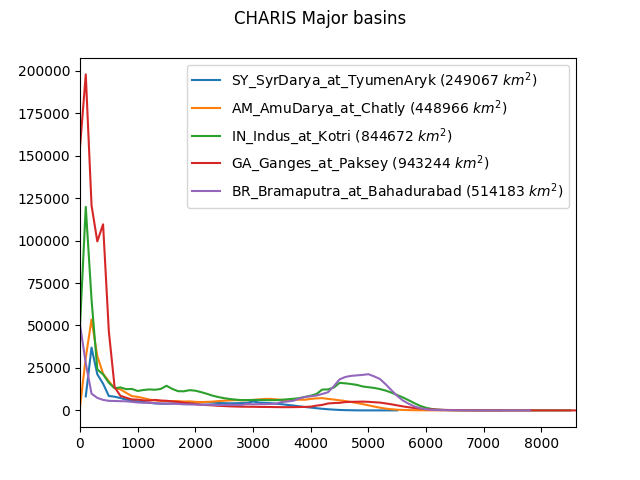

/work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/AM_AmuDarya_at_Chatly.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/IN_Indus_at_Kotri.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/GA_Ganges_at_Paksey.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/BR_Bramaputra_at_Bahadurabad.0100m.area_by_elevation.txt


In [42]:
fig, axes = plt.subplots(1)
for id in majorBasinIDs:
    outFile = myEnv.hypsometry_filename(type='area_by_elevation', drainageID=id)
    print(outFile)
    hyps = Hypsometry(outFile)
    label = "%s (%d $km^2$)" % (id, hyps.data.sum().sum())
    df.ix[id,'Basin Area (km2)'] = hyps.data.sum().sum()
    hyps.data.loc['NoDate'].plot(label=label)
    axes.legend()
fig.suptitle('CHARIS Major basins')
fig.savefig("/work/charis/ti_model/derived_hypsometries/REECv0/CHARIS_basins_area_by_elevation.png")

<IPython.core.display.Javascript object>


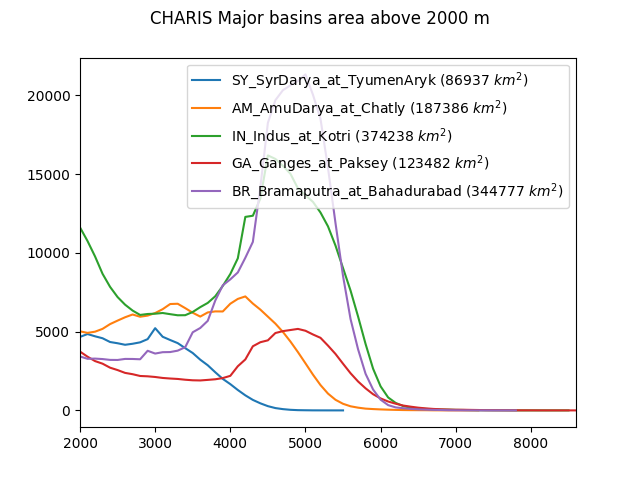

/work/charis/ti_model//derived_hypsometries/REECv0/SY_SyrDarya_at_TyumenAryk.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/AM_AmuDarya_at_Chatly.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/IN_Indus_at_Kotri.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/GA_Ganges_at_Paksey.0100m.area_by_elevation.txt
/work/charis/ti_model//derived_hypsometries/REECv0/BR_Bramaputra_at_Bahadurabad.0100m.area_by_elevation.txt


In [43]:
limit_m = 2000
fig, axes = plt.subplots(1)
for id in majorBasinIDs:
    outFile = myEnv.hypsometry_filename(type='area_by_elevation', drainageID=id)
    print(outFile)
    hyps = Hypsometry(outFile)
    hyps.data.drop(hyps.data.columns[hyps.data.columns < limit_m], axis=1, inplace=True)
    label = "%s (%d $km^2$)" % (id, hyps.data.sum().sum())
    df.ix[id,'Basin Area > %dm (km2)' % limit_m] = hyps.data.sum().sum()
    hyps.data.loc['NoDate'].plot(label=label)
    axes.legend()
fig.suptitle('CHARIS Major basins area above %d m' % limit_m)
fig.savefig("/work/charis/ti_model/derived_hypsometries/REECv0/CHARIS_basins_area_by_elevation.above%dm.png" % limit_m)

In [44]:
df

,Basin Area (km2),Basin Area > 2000m (km2)
Basin,,
SY_SyrDarya_at_TyumenAryk,249067.6007,86937.4069
AM_AmuDarya_at_Chatly,448966.9877,187386.9331
IN_Indus_at_Kotri,844672.8654,374238.7223
GA_Ganges_at_Paksey,943244.3428,123482.8311
BR_Bramaputra_at_Bahadurabad,514183.9421,344777.8927


In [19]:
hyps.data.columns


Index([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500,
       3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700,
       4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
       6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100,
       7200, 7300, 7400, 7500, 7600, 7700, 7800],
      dtype='object')

In [23]:
hyps.data.columns[hyps.data.columns < 2000]

Index([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900],
      dtype='object')

In [24]:
hyps.data.drop(hyps.data.columns[hyps.data.columns < 2000], axis=1, inplace=True)
hyps.data

,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,...,6900,7000,7100,7200,7300,7400,7500,7600,7700,7800
Date,,,,,,,,,,,,,,,,,,,,,
NoDate,3422.3032,3275.0474,3287.0683,3257.2307,3204.4247,3199.7022,3266.461,3262.8118,3243.7072,3783.1445,...,12.2355,7.0837,3.6492,3.0052,1.7173,2.3612,0.8586,0.644,0.644,0.644


In [ ]:
#names = ['Astore', 'DrasNala', 'Gilgit', 'Hunza', 'Kharmong', 'Shigar', 'Shyok', 'Tarbela', 'Zanskar']
#names = ['10']
#names = ['Tarbela']
#drainageIDs = ["IN_OBJECTID%s" % name for name in names]
drainageIDs = ["IN_Hunza_at_DainyorBridge", "AM_Vakhsh_at_Komsomolabad"]
#help(myEnv.model_inputs)

In [ ]:
ablation_method = 'grsize_scag'
threshold = 'fromFile'
# Best scagv09_3strike model against rainfall-ET for Indus:
# model_str = "10.0_10.0_9.0_10.0"
# label = "best_Hunza_model"
# Best scagv09_3strike model against rainfall-ET for Vakhsh:
model_str = "2.67_4.11_6.56_6.67"
label = "best_Vakhsh_model"
nstrikes = 3

years = np.arange(14) + 2001

#years = np.arange(7) + 2001
#DDF_annotation = True
#show_rainfall = True
#rainfall_col = 'rainfall-et_km3'
#show_runoff = True

#years = np.arange(7) + 2008
DDF_annotation = True
show_rainfall = False
rainfall_col = 'rainfall-et_km3'
show_runoff = False

closePlot = True

In [ ]:
model_str, drainageIDs, years, label

In [ ]:
def run_model(drainageID, year=2001, nstrikes=3, ablation_method='grsize_scag', threshold=205, 
              model_str="8.67_8.67_10.0_17.0", label='best_model'):
    input = myEnv.model_inputs(drainageID=drainageID,
                               year=year,
                               modice_nstrikes=nstrikes,
                               ablation_method=ablation_method,
                               threshold=threshold)

    (min_snow_ddf, max_snow_ddf, min_ice_ddf, max_ice_ddf) = model_str.split("_")
    min_snow_ddf = float(min_snow_ddf)
    max_snow_ddf = float(max_snow_ddf)
    min_ice_ddf = float(min_ice_ddf)
    max_ice_ddf = float(max_ice_ddf)
    
    (SOLmelt, SOImelt, EGImelt) = TriSurfTempIndexMelt(
        input['snow_on_land_by_elevation_filename'],
        input['snow_on_ice_by_elevation_filename'],
        input['exposed_glacier_ice_by_elevation_filename'],
        input['temperature_by_elevation_filename'],
        min_snow_ddf=min_snow_ddf,
        max_snow_ddf=max_snow_ddf,
        min_ice_ddf=min_ice_ddf,
        max_ice_ddf=max_ice_ddf)
    
    SOLmeltfile = input['snow_on_land_by_elevation_filename']
    SOImeltfile = input['snow_on_ice_by_elevation_filename']
    EGImeltfile = input['exposed_glacier_ice_by_elevation_filename']
    SOLmeltfile = SOLmeltfile.replace('area_by_elev.', 'melt_by_elev.' + label + '.')
    SOImeltfile = SOImeltfile.replace('area_by_elev.', 'melt_by_elev.' + label + '.')
    EGImeltfile = EGImeltfile.replace('area_by_elev.', 'melt_by_elev.' + label + '.')

    columns = [float(i) for i in SOLmelt.data.columns]
    SOLmelt.data.columns = columns
    SOLmelt.data = SOLmelt.data[sort(columns)]

    # Temporary fix for SOLmelt.data NaNs
    SOLmelt.data = SOLmelt.data.fillna(value=0.)

    columns = [float(i) for i in SOImelt.data.columns]
    SOImelt.data.columns = columns
    SOImelt.data = SOImelt.data[sort(columns)]

    columns = [float(i) for i in EGImelt.data.columns]
    EGImelt.data.columns = columns
    EGImelt.data = EGImelt.data[sort(columns)]

    SOLmelt.write(filename=SOLmeltfile, decimal_places=6)
    SOImelt.write(filename=SOImeltfile, decimal_places=6)
    EGImelt.write(filename=EGImeltfile, decimal_places=6)
    
    print("%s : %d : model=%s" % (drainageID, year, model_str))
    
    baseFilename = SOImeltfile
    p = re.compile(r'snow_on_ice.+')
    baseFilename = p.sub('', baseFilename)
    
    return(baseFilename, input, model_str, SOLmelt, SOImelt, EGImelt)

In [ ]:
def add_isotherm(ax, x, y, color):
    orig_ylim = ax.get_ylim()
    ax.plot(x, y, c=color)
    ax.set_ylim(orig_ylim)

In [ ]:
def show_melt_hyps(drainageID, year, baseFilename, temperatureFilename,
                   SOLmelt, SOImelt, EGImelt, label='best_model', closePlot=True):
    
    year_str = str(year)
    fig, axes = plt.subplots(4,1, figsize=(8,10))
    
    # If SOLmelt is non-empty, but SOImelt and SGImelt are empty,
    # then make a copy of the dimensions of SOLmelt that is filled with zeroes
    if not SOLmelt.data.empty and SOImelt.data.empty and EGImelt.data.empty:
        SOImelt.data = SOLmelt.data.copy()
        SOImelt.data[:] = 0.
        EGImelt.data = SOLmelt.data.copy()
        EGImelt.data[:] = 0.
        
    ImshowTriSurfMelt(axes[:3], SOLmelt, SOImelt, EGImelt)
    
    # Fetch the temperature data hypsometry
    temperatureHyps = Hypsometry(temperatureFilename)
    temperatureHyps.data.replace(to_replace='--', value=0.0, inplace=True)
    axes[3] = temperatureHyps.imshow(ax=axes[3], title='Temperature',
                                     vmin=-45, vmax=45, cmap='RdGy_r'
                                    )
    for ax in axes:
        ax.set_title(drainageID + " (" + year_str + ") " + ax.get_title())
        
    # Add a zero-degree isotherm line to each of the melt plots
    # Find elevation of zero-degree isotherm
    # Default is the highest elevation
    zero_isotherm_elevations = np.full(len(temperatureHyps.data.index),
                                       float(temperatureHyps.data.columns[-1]))
    for i, d in enumerate(temperatureHyps.data.index):
        neg_temps = temperatureHyps.data.loc[d][temperatureHyps.data.loc[d] < 0]
        if len(neg_temps) > 0:
            zero_isotherm_elevations[i] = float(neg_temps.index[0])
    
                                       
        # zero_isotherm_elevations = [
        # float(temperatureHyps.data.loc[d][temperatureHyps.data.loc[d] < 0].index[0]) 
        # for d in temperatureHyps.data.index]
    zero_isotherm_x = temperatureHyps.data.index
    isotherm_color = (0.8, 0.8, 0.8)
    add_isotherm(axes[0], zero_isotherm_x, zero_isotherm_elevations, isotherm_color)
    add_isotherm(axes[1], zero_isotherm_x, zero_isotherm_elevations, isotherm_color)
    add_isotherm(axes[2], zero_isotherm_x, zero_isotherm_elevations, isotherm_color)
    add_isotherm(axes[3], zero_isotherm_x, zero_isotherm_elevations, isotherm_color)
    
    fig.tight_layout()
    outfile = baseFilename + label + '.melt_hyps.png'
    fig.savefig(outfile)
    print("Wrote melt_hyps to %s" % outfile)
    if (closePlot):
        plt.close('all')

In [ ]:
def show_melt_tseries(drainageID, year, baseFilename, input, model_str,
                      SOLmelt, SOImelt, EGImelt,
                      label='best_model',
                      DDF_annotation=True, show_rainfall=False, rainfall_col=None, 
                      show_runoff=False,
                      closePlot=True):
    year_str = str(year)
    (min_snow_ddf, max_snow_ddf, min_ice_ddf, max_ice_ddf) = model_str.split("_")
    min_snow_ddf = float(min_snow_ddf)
    max_snow_ddf = float(max_snow_ddf)
    min_ice_ddf = float(min_ice_ddf)
    max_ice_ddf = float(max_ice_ddf)
    
    melt_by_doy = (SOLmelt.data_by_doy() +
                   SOImelt.data_by_doy() +
                   EGImelt.data_by_doy())
    total_melt = melt_by_doy.sum()
    print("total melt = %.2f" % total_melt)
    melt_by_month = melt_by_doy.groupby([pd.TimeGrouper('M')]).sum().to_frame(name='melt')

    yyyymm_index = pd.to_datetime(melt_by_month.index.map(lambda x: x.strftime('%Y-%m-15')))
    df = pd.DataFrame(data=melt_by_month.values, index=yyyymm_index, columns=['melt'])
    df['SOLmelt'] = SOLmelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
    df['SOImelt'] = SOImelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
    df['EGImelt'] = EGImelt.data_by_doy().groupby([pd.TimeGrouper('M')]).sum().values
    #print(df)
    
    
    fig, ax = plt.subplots(3,1,figsize=(9,9))
    left_ax, right_ax = PlotTriSurfInput(
        ax[0], 
        input['snow_on_land_by_elevation_hyps'],
        input['snow_on_ice_by_elevation_hyps'],
        input['exposed_glacier_ice_by_elevation_hyps'],
        input['temperature_by_elevation_hyps'],
        temperature_color=(0.7, 0.7, 0.7),
        title="Inputs for %s (%d)" % (drainageID, year))
    
    h, l = left_ax.get_legend_handles_labels()                                       
    h1, l1 = right_ax.get_legend_handles_labels()                                    
    left_ax.legend(h+h1, l+l1, framealpha=0.5) 
    #left_ax.legend(framealpha=0.5)
    ax[1] = PlotTriSurfMelt(
        ax[1], 
        SOLmelt, 
        SOImelt, 
        EGImelt, 
        title="Modelled melt for %s (%d)" % (drainageID, year))
    ax[1].legend(framealpha=0.5)
    if DDF_annotation:
        ax[1].text(ax[1].get_xlim()[0] + (0.03 * (ax[1].get_xlim()[1] - ax[1].get_xlim()[0])), 
                   ax[1].get_ylim()[1] * 0.7,
                   'snow DDF = %.2f - %.2f $mm/C/day$\nice DDF = %.2f - %.2f $mm/C/day$' % 
                   (min_snow_ddf, max_snow_ddf, min_ice_ddf, max_ice_ddf),
                   style='italic',
                   bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
    
    # Get the line colors used by PlotTriSurfMelt
    lines = ax[1].get_lines()
    SOIcolor = lines[1].get_color()
    EGIcolor = lines[2].get_color()
    SOLcolor = lines[3].get_color()

    title = "Melt"
    right_bar_list = ['EGImelt', 'SOImelt', 'SOLmelt']
    right_bar_colors = [ EGIcolor, SOIcolor, SOLcolor ]
    right_bar_title = "melt"
    right_bar_sum = df["melt"].sum()
    ylim = np.amax(df["melt"])
    
    # Fetch rainfall and/or runoff, if requested
    if show_rainfall:
        rainfallFile = myEnv.calibration_filename(type="rainfall", drainageID=drainageID)
        rainfall = TimeSeries(rainfallFile)
        monthly_rainfall = rainfall.data['rainfall'][year_str + '-01-01':year_str + '-12-01']
        if rainfall_col == "rainfall-et_km3":
            rainfall_label = "rainfall-ET"
        elif rainfall_col == "rainfall":
            rainfall_label = "rainfall"
        else:
            rainfall_label = "rainfall_unspecified"
        df[rainfall_label] = monthly_rainfall.values
        rainfallcolor = 'c'
        right_bar_list = [rainfall_label] + right_bar_list
        right_bar_colors = [ rainfallcolor ] + right_bar_colors
        ylim = np.amax(df["melt"] + df[rainfall_label])
        title = rainfall_label + " + Melt"
        right_bar_title = 'melt + ' + rainfall_label
        right_bar_sum = df["melt"].sum() + df[rainfall_label].sum()
            
    monthly_annotation = '%s = %.2f $km^3$' % (right_bar_title, right_bar_sum)
    if show_runoff:
        runoffFile = myEnv.calibration_filename(type="runoff", drainageID=drainageID)
        runoff = TimeSeries(runoffFile)
        monthly_runoff = runoff.data['runoff'][year_str + '-01-01':year_str + '-12-01']
        df["runoff"] = monthly_runoff.values
        runoffcolor = (0.8, 0.8, 0.8)
        ylim = np.amax([ylim, np.amax(df["runoff"])])
        title = "Runoff vs. " + title
        df[["runoff"]].plot(ax=ax[2], kind="bar",
                            edgecolor=(0.9, 0.9, 0.9),
                            color=[runoffcolor])
        monthly_annotation = '%s = %.2f $km^3$\nrunoff = %.2f $km^3$' % (
            right_bar_title, right_bar_sum, df["runoff"].sum())
    
    df[right_bar_list].plot(ax=ax[2], 
                            stacked=True, kind="bar", 
                            position=0.,
                            edgecolor=(0.9, 0.9, 0.9),
                            color=right_bar_colors)
    ax[2].set_title("Monthly " + title)
    ax[2].set_ylabel('Volume (' + r'$km^3$' + ')') 
    ax[2].xaxis.set_major_formatter(plt.NullFormatter())
    for container in ax[2].containers:
        plt.setp(container, width=0.25)
    ax[2].set_ylim([0, 1.1 * ylim])
    ax[2].text(ax[2].get_xlim()[0] + (0.03 * (ax[2].get_xlim()[1] - ax[2].get_xlim()[0])),
               ax[2].get_ylim()[1] * 0.7,
               monthly_annotation,
               style='italic',
               bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
    handles, labels = ax[2].get_legend_handles_labels()
    ax[2].legend(reversed(handles), reversed(labels))
    
    fig.tight_layout()
    outfile = baseFilename + label + '.melt_tseries.png'
    fig.savefig(outfile)
    print("Wrote melt_tseries to %s" % outfile)
    if (closePlot):
        plt.close('all')

In [ ]:
for drainageID in drainageIDs:
    for year in years:
        (baseFilename, input, model_str, SOLmelt, SOImelt, EGImelt) = run_model(
            drainageID=drainageID, year=year, nstrikes=nstrikes,
            ablation_method=ablation_method, threshold=threshold,
            model_str=model_str, label=label)
        show_melt_hyps(drainageID, year, baseFilename, input['temperature_by_elevation_filename'],
                       SOLmelt, SOImelt, EGImelt, label=label, closePlot=closePlot)
        show_melt_tseries(drainageID, year, baseFilename, input, model_str, 
                          SOLmelt, SOImelt, EGImelt,
                          label=label,
                          DDF_annotation=DDF_annotation, 
                          show_rainfall=show_rainfall,
                          rainfall_col=rainfall_col,
                          show_runoff=show_runoff,
                          closePlot=closePlot)

In [ ]:
hyps = Hypsometry(filename="/Users/brodzik/projects/CHARIS/derived_hypsometries/modscag_gf_grsize_scag/IN_OBJECTID10/IN_OBJECTID10.2001.0100m.ERA_Interim_downscale_uncorrected_tsurf.v0.2_by_elev.txt")

In [ ]:
#hyps.data
